#Nama : Musthafa Zaki Bahar
#Kelas : Persevere

##Tugas individu: 
Market Basket Analysis Referensi: : https://bit.ly/TUGAS-MBA-DATA • Gunakan data pada alamat Kaggle tersebut • Lakukan preprocessing data dan analisis Market Basket Analysis Ceritakan/tuliskan insight yang kamu dapatkan baik dari preprocessing data dan hasil analisis Market Basket Analysis • Kirimkan hasil tugas (PDF), pada form berikut: https://bit.ly/TUGAS-MBA-DS • Deadline: Sabtu, 2 April 2022. 23:59

## **1. Import Library**
Pertama-tama mengimpor library yang akan kita gunakan untuk analisis eksplorasi data dan visualisasi data.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **2. Import Dataset**
Kita akan menggunakan data BreadBasket_DMS.csv yang bisa temen-temen download [disini](https://www.kaggle.com/datasets/dragonheir/basket-optimisation)

Sekarang import data ke DataFrame dengan library pandas.

In [ ]:
#Import file dari github(data sudah didownload dan diupload kedalam github sebelumnya)
df = pd.read_csv('https://raw.githubusercontent.com/mzakibhr/Orbit/main/ClassPersevere-minggu4/dataset/Market_Basket_Optimisation.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **3. Data Preparation**
Pada tahapan ini kita akan memastikan tipe data yang digunakan sesuai, tidak ada nilai kosong 

In [ ]:
#Cek data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Mengisi data kosong dengan 0
df.fillna(0,inplace=True)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Mengelompokkan setiap transaksi dengan item dan tidak mengambil data yang bernilai 0
transactions = []
for i in range(0,len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0,20) if str(df.values[i,j])!='0'])

In [ ]:
#Memisahakan setiap item untuk setiap transaksinya
new = []
for i in range(len(transactions)):
  for j in transactions[i]:
    new.append((i, j))

In [ ]:
#Membuat dataframe dari data yang sudah dipreparation
df_new = pd.DataFrame(new)
df_new.columns = ['Transaction', 'Item']

In [ ]:
#Drop Transaksi 0
df = df_new[df_new.Transaction != 0]

In [ ]:
df

,Transaction,Item
20,1,burgers
21,1,meatballs
22,1,eggs
23,2,chutney
24,3,turkey
...,...,...
29358,7499,green tea
29359,7500,eggs
29360,7500,frozen smoothie
29361,7500,yogurt cake


In [ ]:
#Cek Unique Item
print('Unique Items: ', df['Item'].nunique())
print( '\n', df['Item'].unique())

Unique Items:  120

 ['burgers' 'meatballs' 'eggs' 'chutney' 'turkey' 'avocado' 'mineral water'
 'milk' 'energy bar' 'whole wheat rice' 'green tea' 'low fat yogurt'
 'whole wheat pasta' 'french fries' 'soup' 'light cream' 'shallot'
 'frozen vegetables' 'spaghetti' 'pet food' 'cookies' 'cooking oil'
 'champagne' 'salmon' 'shrimp' 'chocolate' 'chicken' 'honey' 'oil'
 'fresh tuna' 'tomatoes' 'black tea' 'extra dark chocolate' 'protein bar'
 'red wine' 'pasta' 'pepper' 'shampoo' 'rice' 'sparkling water' 'ham'
 'body spray' 'pancakes' 'grated cheese' 'white wine' 'toothpaste'
 'parmesan cheese' 'fresh bread' 'ground beef' 'frozen smoothie'
 'escalope' 'yams' 'herb & pepper' 'tomato sauce' 'magazines'
 'strawberries' 'strong cheese' 'pickles' 'cake' 'cottage cheese'
 'hot dogs' 'brownies' 'cereals' 'clothes accessories' 'bug spray'
 'muffins' 'light mayo' 'olive oil' 'gums' 'soda' 'energy drink' 'cider'
 'corn' 'yogurt cake' 'mint' 'butter' 'asparagus' 'salad' 'french wine'
 'salt' 'almonds'

In [ ]:
# Cek missing value dan zeros
print(df.isnull().sum().sort_values(ascending=False))

Transaction    0
Item           0
dtype: int64


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29363 entries, 0 to 29362
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Transaction  29363 non-null  int64 
 1   Item         29363 non-null  object
dtypes: int64(1), object(1)
memory usage: 458.9+ KB


## **4. Visualisasi dan Memahami Data**

In [ ]:
# Mencetak 20 data penjualan item terbanyak
most_sold = df['Item'].value_counts().head(20)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

mineral water        1787
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1230
green tea             990
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
burgers               654
cake                  608
cookies               603
escalope              595
low fat yogurt        573
shrimp                535
tomatoes              513
olive oil             493
frozen smoothie       474
turkey                469
Name: Item, dtype: int64


In [ ]:
transaction_count = df.groupby(by='Item')[['Transaction']].count().sort_values(by='Transaction', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,Transaction
Item,
mineral water,6.090039
eggs,4.593941
spaghetti,4.450806
french fries,4.369015
chocolate,4.191800


Text(0.5, 1.0, 'Items Most Sold')

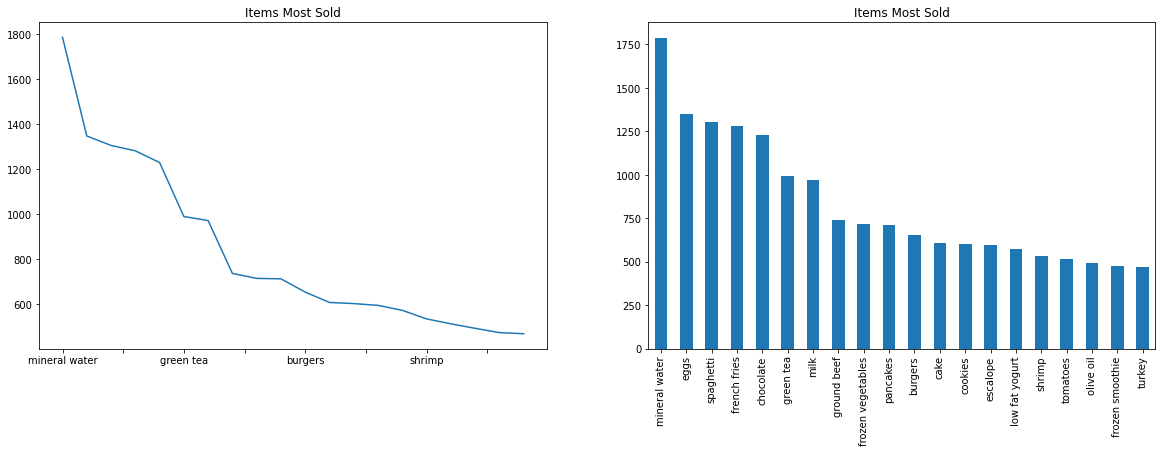

In [ ]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
#plt.plot(most_sold)
most_sold.plot(kind='line')
plt.title('Items Most Sold')


plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('Items Most Sold')

Bedasarkan hasil visualisasi, mineral water adalah barang yang paling banyak terjual diikuti eggs, spaghetti, french fries dan chocolate.

## **5. Market Basket Analysis**

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [ ]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['Transaction'].unique():
    tlist = list(set(df[df['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

7500


menggunakan TransactionEncoder untuk merubah bentuk transaction_list()

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
frequent_itemsets = apriori(df2, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
4,(spaghetti),(mineral water),0.059733,0.343032,1.439698
5,(mineral water),(spaghetti),0.059733,0.250699,1.439698
0,(chocolate),(mineral water),0.052667,0.321400,1.348907
1,(mineral water),(chocolate),0.052667,0.221041,1.348907
2,(eggs),(mineral water),0.050933,0.283383,1.189351
3,(mineral water),(eggs),0.050933,0.213766,1.189351


In [ ]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
217,(herb & pepper),(ground beef),0.016000,0.323450,3.291555
216,(ground beef),(herb & pepper),0.016000,0.162822,3.291555
385,"(spaghetti, mineral water)",(ground beef),0.017067,0.285714,2.907540
388,(ground beef),"(spaghetti, mineral water)",0.017067,0.173677,2.907540
397,"(spaghetti, mineral water)",(olive oil),0.010267,0.171875,2.614731
...,...,...,...,...,...
155,(french fries),(low fat yogurt),0.013333,0.078003,1.020983
130,(olive oil),(eggs),0.012000,0.182556,1.015704
131,(eggs),(olive oil),0.012000,0.066766,1.015704
144,(spaghetti),(escalope),0.014000,0.080398,1.013422


# **Kesimpulan**

Dari analisis yang telah dilakukan dapat disimpulkan bahwa air mineral merupakan konsekuensi populer. Dan terdapat beberapa korelasi yang cukup menarik (format: antecedant(s) -> consequent):

> (herb & pepper) -> ground beef

> (spaghetti, mineral water) -> ground beef

> (spaghetti, mineral water) -> olive oil

Dan dengan menggunakan min_support = 0.05 didapatkan beberapa kesimpulan yang muncul yaitu:

- Ada 5% dari 7500 transaksi yang membeli spagheti dan mineral water secara bersamaan
- Peluang orang yang membeli spaghetti ketika dia membeli mineral water sebesar 34%
- Peluang orang yang membeli mineral water ketika dia membeli spaghetti sebesar 25%

-----------------------------------

- Ada 5% dari 7500 transaksi yang membeli chocolate dan mineral water secara bersamaan
- Peluang orang yang membeli chocolate ketika dia membeli mineral water sebesar 32%
- Peluang orang yang membeli mineral water ketika dia membeli chocolate sebesar 22%

-----------------------------------

- Ada 5% dari 7500 transaksi yang membeli eggs dan mineral water secara bersamaan
- Peluang orang yang membeli eggs ketika dia membeli mineral water sebesar 28%
- Peluang orang yang membeli mineral water ketika dia membeli eggs sebesar 21%

Setelah mengetahui korelasi antara item dan kepentingan bersama pelanggan, bisnis dapat membuat keputusan berdasarkan temuan ini. Sehingga bisa meningkatkan sales berdasarkan keputusan tersebut.